In [1]:
%run ../../utils/commonImports.py
%matplotlib inline

# Load data

In [2]:
featured = read_tsv('D:\\Dropbox\\My work\\krypl-project\\dataFeatures\\candle-shape.tsv')
featured.tail()

,timestamp,period,open,high,low,close,volume,quoteVolume,weightedAverage,date,...,low_high_ratio_lag_9,open_close_ratio_lag_1,open_close_ratio_lag_2,open_close_ratio_lag_3,open_close_ratio_lag_4,open_close_ratio_lag_5,open_close_ratio_lag_6,open_close_ratio_lag_7,open_close_ratio_lag_8,open_close_ratio_lag_9
381237,1538744100,5min,"6,589.1520","6,594.8563","6,589.1520","6,594.8563",624.8332,0.0948,"6,591.3772",2018-10-05 12:55:00,...,1.0000,0.0000,-0.0001,0.0000,0.0002,0.0006,0.0007,0.0000,0.0000,0.0000
381238,1538744400,5min,"6,589.9249","6,594.9835","6,589.9249","6,594.9835","7,250.7049",1.1001,"6,590.6590",2018-10-05 13:00:00,...,1.0000,-0.0009,0.0000,-0.0001,0.0000,0.0002,0.0006,0.0007,0.0000,0.0000
381239,1538744700,5min,"6,590.1520","6,594.9173","6,590.1520","6,594.9173",603.4239,0.0915,"6,592.2003",2018-10-05 13:05:00,...,1.0000,-0.0008,-0.0009,0.0000,-0.0001,0.0000,0.0002,0.0006,0.0007,0.0000
381240,1538745000,5min,"6,594.0000","6,595.0000","6,594.0000","6,595.0000","1,476.3254",0.2239,"6,594.0279",2018-10-05 13:10:00,...,0.9993,-0.0007,-0.0008,-0.0009,0.0000,-0.0001,0.0000,0.0002,0.0006,0.0007
381241,1538745300,5min,"6,595.1000","6,595.9343","6,595.1000","6,595.9343",386.2321,0.0586,"6,595.3626",2018-10-05 13:15:00,...,0.9989,-0.0002,-0.0007,-0.0008,-0.0009,0.0000,-0.0001,0.0000,0.0002,0.0006


# Scatter matrix

In [3]:
featured.columns

Index(['timestamp', 'period', 'open', 'high', 'low', 'close', 'volume',
       'quoteVolume', 'weightedAverage', 'date', 'label', 'close_high_ratio',
       'open_high_ratio', 'low_high_ratio', 'open_close_ratio',
       'close_high_ratio_lag_1', 'close_high_ratio_lag_2',
       'close_high_ratio_lag_3', 'close_high_ratio_lag_4',
       'close_high_ratio_lag_5', 'close_high_ratio_lag_6',
       'close_high_ratio_lag_7', 'close_high_ratio_lag_8',
       'close_high_ratio_lag_9', 'open_high_ratio_lag_1',
       'open_high_ratio_lag_2', 'open_high_ratio_lag_3',
       'open_high_ratio_lag_4', 'open_high_ratio_lag_5',
       'open_high_ratio_lag_6', 'open_high_ratio_lag_7',
       'open_high_ratio_lag_8', 'open_high_ratio_lag_9',
       'low_high_ratio_lag_1', 'low_high_ratio_lag_2', 'low_high_ratio_lag_3',
       'low_high_ratio_lag_4', 'low_high_ratio_lag_5', 'low_high_ratio_lag_6',
       'low_high_ratio_lag_7', 'low_high_ratio_lag_8', 'low_high_ratio_lag_9',
       'open_close_ratio_la

LinAlgError: singular matrix

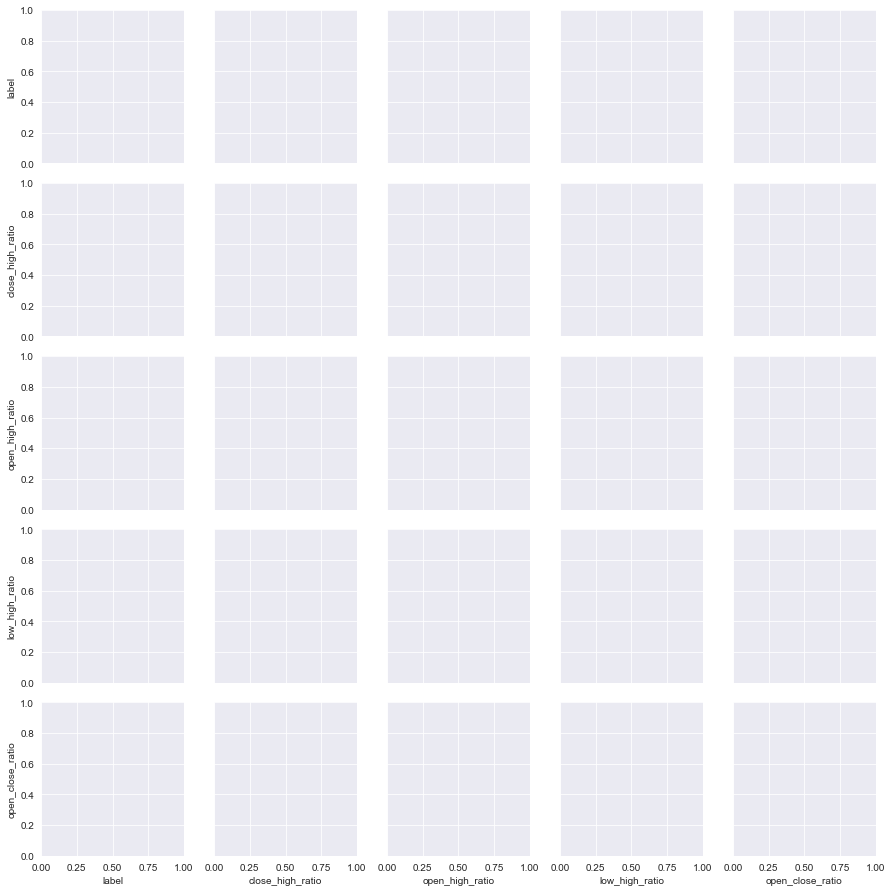

In [25]:
cols = ['label', 'close_high_ratio', 'open_high_ratio', 'low_high_ratio', 'open_close_ratio']
sampled = featured.query("date < '2017-09-15'").sample(10**4)
sns.pairplot(sampled[cols], hue='label', hue_order=[0, 1], vars=cols, plot_kws={'alpha': 0.3});

# Close high ratio

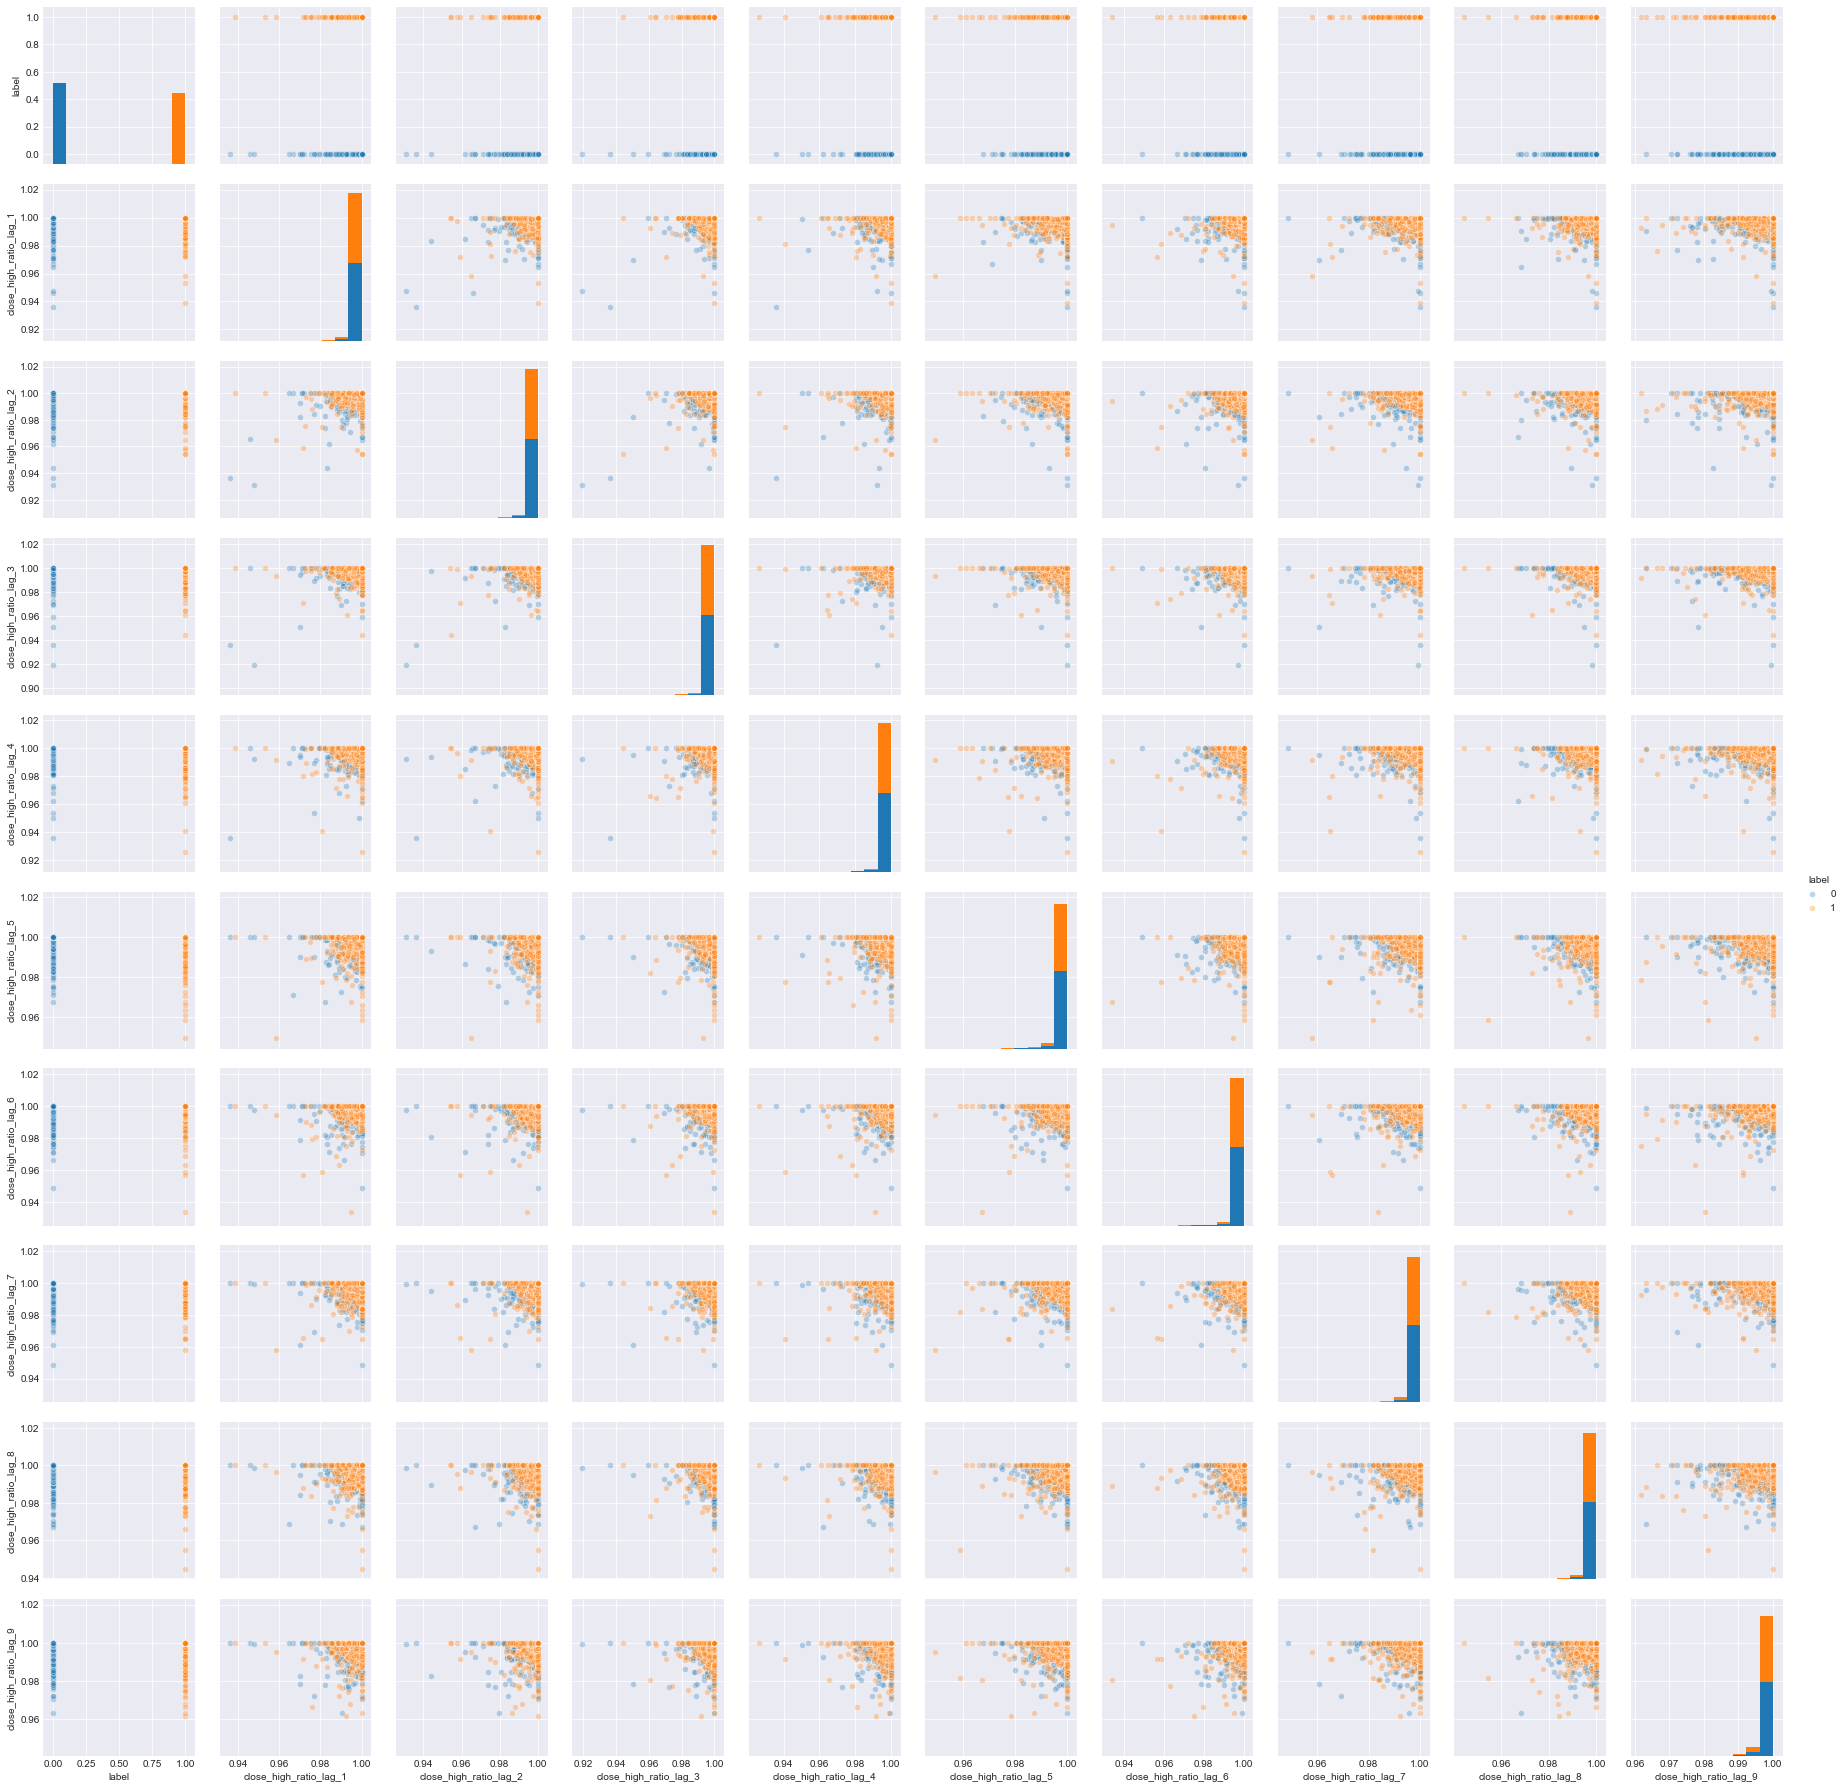

In [5]:
cols = ['label', 'close_high_ratio_lag_1', 'close_high_ratio_lag_2',
       'close_high_ratio_lag_3', 'close_high_ratio_lag_4',
       'close_high_ratio_lag_5', 'close_high_ratio_lag_6',
       'close_high_ratio_lag_7', 'close_high_ratio_lag_8',
       'close_high_ratio_lag_9']
sampled = featured.query("date < '2017-09-15'").sample(10**4)
sns.pairplot(sampled[cols], hue='label', hue_order=[0, 1], vars=cols, plot_kws={'alpha': 0.3});

# Open close ratio

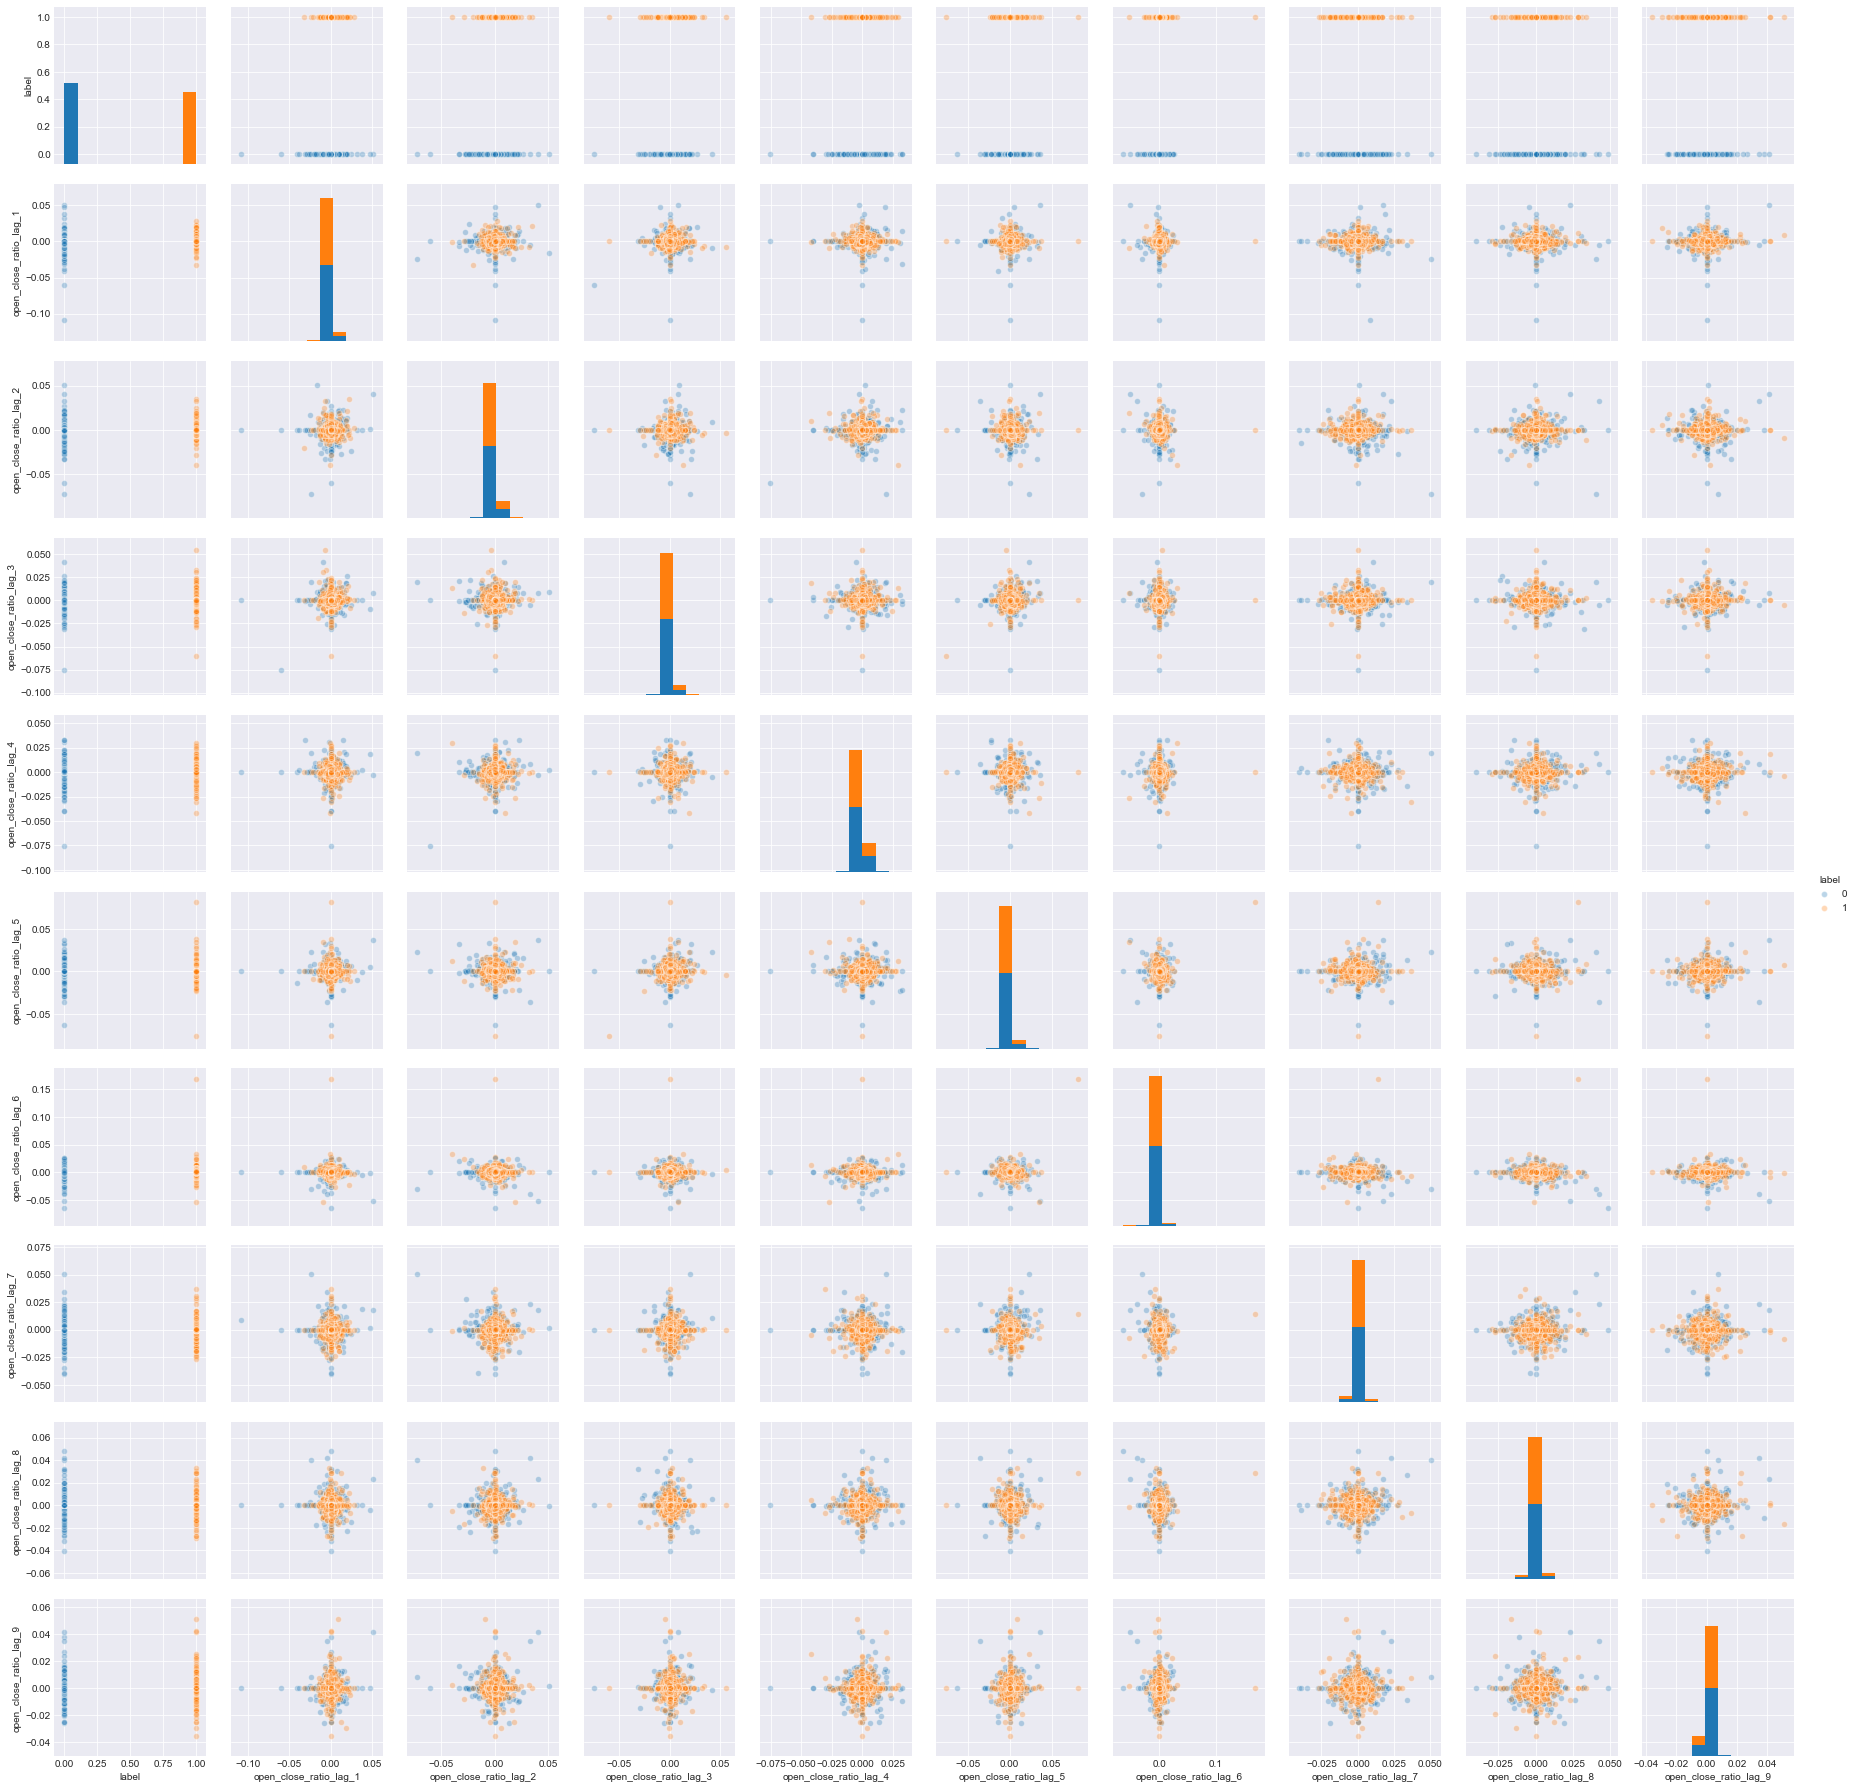

In [6]:
cols = ['label', 'open_close_ratio_lag_1', 'open_close_ratio_lag_2',
       'open_close_ratio_lag_3', 'open_close_ratio_lag_4',
       'open_close_ratio_lag_5', 'open_close_ratio_lag_6',
       'open_close_ratio_lag_7', 'open_close_ratio_lag_8',
       'open_close_ratio_lag_9']
sampled = featured.query("date < '2017-09-15'").sample(10**4)
sns.pairplot(sampled[cols], hue='label', hue_order=[0, 1], vars=cols, plot_kws={'alpha': 0.3});

# TSNE

In [21]:
from sklearn.manifold import TSNE
cols = ['close_high_ratio',
       'open_high_ratio', 'low_high_ratio', 'open_close_ratio',
       'close_high_ratio_lag_1', 'close_high_ratio_lag_2',
       'close_high_ratio_lag_3', 'close_high_ratio_lag_4',
       'close_high_ratio_lag_5', 'close_high_ratio_lag_6',
       'close_high_ratio_lag_7', 'close_high_ratio_lag_8',
       'close_high_ratio_lag_9', 'open_high_ratio_lag_1',
       'open_high_ratio_lag_2', 'open_high_ratio_lag_3',
       'open_high_ratio_lag_4', 'open_high_ratio_lag_5',
       'open_high_ratio_lag_6', 'open_high_ratio_lag_7',
       'open_high_ratio_lag_8', 'open_high_ratio_lag_9',
       'low_high_ratio_lag_1', 'low_high_ratio_lag_2', 'low_high_ratio_lag_3',
       'low_high_ratio_lag_4', 'low_high_ratio_lag_5', 'low_high_ratio_lag_6',
       'low_high_ratio_lag_7', 'low_high_ratio_lag_8', 'low_high_ratio_lag_9',
       'open_close_ratio_lag_1', 'open_close_ratio_lag_2',
       'open_close_ratio_lag_3', 'open_close_ratio_lag_4',
       'open_close_ratio_lag_5', 'open_close_ratio_lag_6',
       'open_close_ratio_lag_7', 'open_close_ratio_lag_8',
       'open_close_ratio_lag_9']
sampled = featured.query("date < '2017-09-15'").sample(10**3)

X_embedded = TSNE(n_components=2).fit_transform(sampled[cols])

In [22]:
data_embedded = pd.DataFrame(X_embedded)
data_embedded['label'] = sampled['label'].apply(int).values

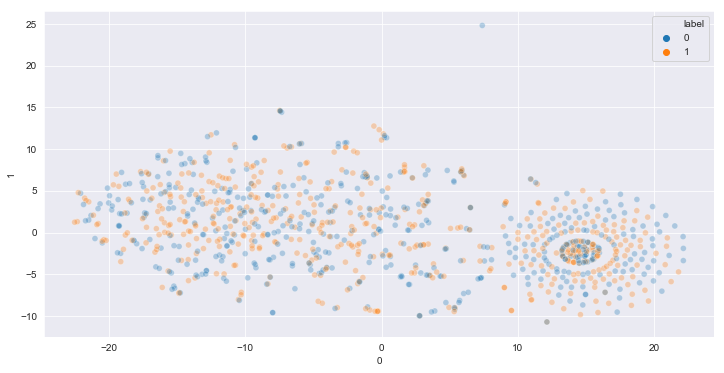

In [24]:
plt.figure(figsize=[12, 6])
sns.scatterplot(data_embedded[0], data_embedded[1], hue=data_embedded['label'], hue_order=[0, 1], alpha=0.3);